In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
file_path = 'D:/Sem IV_Kecerdasan Buatan/Tugas Akhir UAS AI_RK-A2_Kel 11/Dataset/Kepuasan terhadap Perpustakaan Kampus _C_ Universitas Airlangga (Responses).csv'
data = pd.read_csv(file_path)

In [5]:
data.head()

,Timestamp,Responden,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,11/6/2024 8:44,R1,3,4,1,3,4,1,3,3,4
1,11/6/2024 9:29,R2,5,2,1,3,3,1,2,3,1
2,11/6/2024 10:10,R3,3,5,5,3,5,3,3,5,5
3,11/6/2024 11:03,R4,2,3,1,2,3,1,1,2,1
4,11/6/2024 11:19,R5,4,4,2,4,4,2,4,4,5


Data Processing

In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  20 non-null     object
 1   Responden  20 non-null     object
 2   Q1         20 non-null     int64 
 3   Q2         20 non-null     int64 
 4   Q3         20 non-null     int64 
 5   Q4         20 non-null     int64 
 6   Q5         20 non-null     int64 
 7   Q6         20 non-null     int64 
 8   Q7         20 non-null     int64 
 9   Q8         20 non-null     int64 
 10  Q9         20 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 1.8+ KB


Timestamp    0
Responden    0
Q1           0
Q2           0
Q3           0
Q4           0
Q5           0
Q6           0
Q7           0
Q8           0
Q9           0
dtype: int64

In [7]:
data.duplicated().any()

False

In [21]:
df = pd.DataFrame(data)
df_numeric = df.drop(columns=['Timestamp', 'Responden'])
data.head()

,Timestamp,Responden,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,11/6/2024 8:44,R1,3,4,1,3,4,1,3,3,4
1,11/6/2024 9:29,R2,5,2,1,3,3,1,2,3,1
2,11/6/2024 10:10,R3,3,5,5,3,5,3,3,5,5
3,11/6/2024 11:03,R4,2,3,1,2,3,1,1,2,1
4,11/6/2024 11:19,R5,4,4,2,4,4,2,4,4,5


Pemodelan K-Means Clustering

In [25]:
#inisialisasi nilai kluster
kmeans = KMeans(n_clusters=2, random_state=42)

#K-Means Clustering
kmeans.fit(df_numeric)
df['Cluster'] = kmeans.labels_

#visualisasi kluster dengan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numeric)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

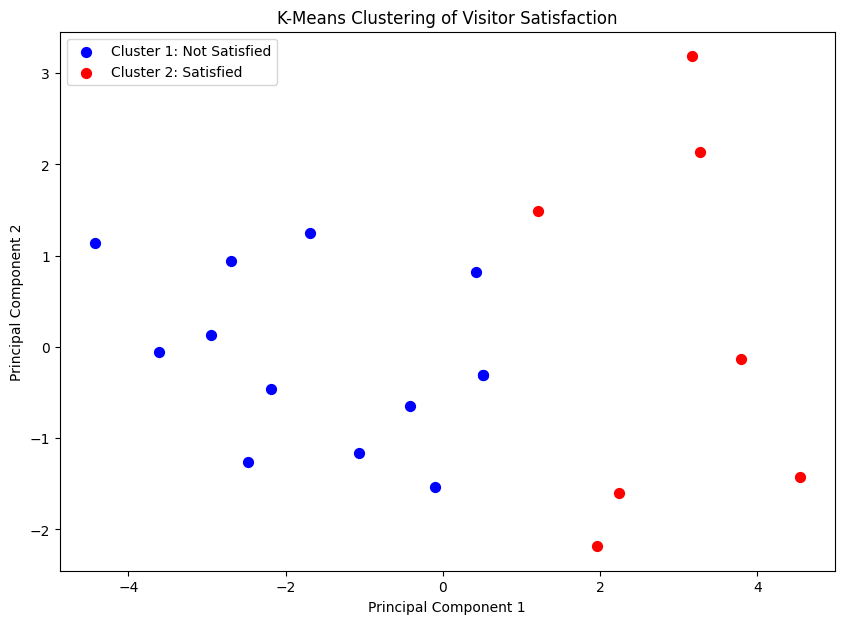

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(df[df['Cluster'] == 0]['PC1'], df[df['Cluster'] == 0]['PC2'], s=50, c='blue', label='Cluster 1: Not Satisfied')
plt.scatter(df[df['Cluster'] == 1]['PC1'], df[df['Cluster'] == 1]['PC2'], s=50, c='red', label='Cluster 2: Satisfied')
plt.title('K-Means Clustering of Visitor Satisfaction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Output Clustering

In [27]:
cluster_0 = df[df['Cluster'] == 0]['Responden'].tolist()
cluster_1 = df[df['Cluster'] == 1]['Responden'].tolist()

if len(cluster_0) == 12:
    not_satisfied = cluster_0
    satisfied = cluster_1
else:
    not_satisfied = cluster_1
    satisfied = cluster_0

print(f"Responden yang tidak puas (jumlah {len(not_satisfied)}): {not_satisfied}")
print(f"Responden yang puas (jumlah {len(satisfied)}): {satisfied}")

Responden yang tidak puas (jumlah 7): ['R3', 'R5', 'R7', 'R13', 'R16', 'R18', 'R20']
Responden yang puas (jumlah 13): ['R1', 'R2', 'R4', 'R6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R14', 'R15', 'R17', 'R19']
